# Simulations Homework

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

---

### Reset Generator Function

If you didn't do so in class, write a function to reseed the numpy random number generator. It should default to setting the seed to 42, but be able to set it to whatever you want.

In [2]:
def reset_rng(seed=42):
    rng = np.random.default_rng(seed)
    
    return rng

Reset the generator using your function.

In [26]:
rng = reset_rng()

---

### "Accept Cookies" Simulation

Assuming the base rate for hitting the "Accept Cookies" button when landing on a website is 85%, do a set of 10,000 simulations of 20 people visiting a given website and accepting cookies. 

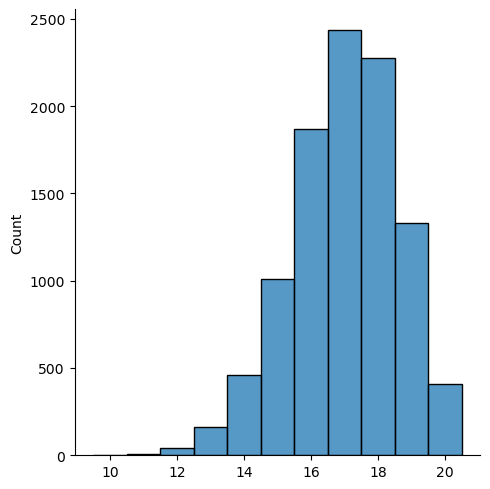

In [31]:
n_sample = 20
prob = .85
n_sim = 10000
cookies_sim = rng.binomial(n_sample, prob, n_sim)
sns.displot(cookies_sim, discrete=True)

Based on your simulation, what is the probability of getting exactly 15 accepts? 

In [32]:
p15 = sum(cookies_sim==15)/len(cookies_sim)
p15

0.101

What is the probability of getting *at least* 15 accepts?

In [33]:
pAtLeast15 = sum(cookies_sim>=15)/len(cookies_sim)
pAtLeast15

0.9326

What is the probability of getting fewer than 15 accepts?

In [34]:
pLess15 = sum(cookies_sim<15)/len(cookies_sim)
pLess15

0.0674

Confirm that the last two probabilities computed sum to 1.0.

In [35]:
pAtLeast15 + pLess15

1.0

---

### What Is and Isn't Binomial?

Check the binomial approximation for the election simulations from the in-class notebook for the cases in which we did and didn't account for the poll-to-poll variability arising from a single poll.

What is the expected standard deviation for our distribution of election outcomes based on the normal approximation?

In [36]:
# set the constants
n_sample = 100000 # number of voters in the election
prob =.51 # probability that they vote for A
n_sim = 100000 # number of election simulations

# determine the sd
sd_est = np.sqrt(n_sample * prob * (1 - prob))
sd_est

158.082257068907

What was the empirical standard deviation of the distribution of election outcomes when we only used a single probability? ("*single poll, many elections*")

(You can just copy and paste the code from the in-class notebook to regenerate the simulated election outcomes.)

In [37]:
rng = reset_rng()
election_outcomes = rng.binomial(n=100000, p=.51, size=20000)

In [38]:
np.std(election_outcomes)

158.93412097331398

What was the empirical standard deviation of the distribution of election outcomes when we accounted for random variation in poll outcomes in our simulation? ("*simulate poll -> simulate election*")

In [39]:
rng = reset_rng() 
# constants
prob = .51  # best guess of "true" probability
sample = 2000  # poll sample size
sims = 100000  # number of simulations to run
# conduct polls
poll_results = rng.binomial(n=sample, p=prob, size=sims) # get the polling results
poll_probs = poll_results/sample  # convert to probabilities
# simulate the elections
sample=100000 # medium city - expect around 100k voter turnout
election_outcomes = rng.binomial(n=sample, p=poll_probs, size=sims)

In [40]:
np.std(election_outcomes)

1126.0395066316592

When we simulate the poll to include variability in our election results, the election outcomes are no longer part of a binomial distribution

---

### Effect of Poll Sample Size

As you have probably realized, these distributions of outcomes from many experiments we've been generating are, by definition, ***sampling distributions***! One firm law about sampling distributions is that their width depends strongly on sample size. As such, we would expect our simulated election outcomes to be affected by the size of the poll on which they are based.

In the cell below, run the *simulate poll -> simulate elections* code for poll sample sizes of 50, 100, 500, 1000, 2000 and 5000. For each sample size, record the obtained standard deviation of the distribution of outcomes. (pro tip: make a new code cell below and put them in a Python list)

In [43]:
 rng = reset_rng() # reset generator

In [44]:
sample_sizes = [50, 100, 500, 1000, 2000, 5000]

In [45]:
# simulate
# constants
prob = .51  # best guess of "true" probability
sample = 2000  # poll sample size
sims = 100000  # number of simulations to run
d = {}
for i in range(len(sample_sizes)):
    # conduct polls
    print(sample_sizes[i])
    poll_results = rng.binomial(n=sample_sizes[i], p=prob, size=sims) # get the polling results
    poll_probs = poll_results/sample_sizes[i]  # convert to probabilities
    # simulate the elections
    sample=100000 # medium city - expect around 100k voter turnout
    d["poll_size_of_{0}".format(sample_sizes[i])] = rng.binomial(n=sample, p=poll_probs, size=sims)
election_outcomes = pd.DataFrame(d)
election_outcomes

50
100
500
1000
2000
5000


poll_size_of_50  poll_size_of_100  poll_size_of_500  poll_size_of_1000  \
0                46158             60275             49729              48826   
1                51890             49205             51074              50805   
2                43927             51152             54739              50266   
3                47880             46229             52591              50724   
4                59838             48778             52816              49808   
...                ...               ...               ...                ...   
99995            55902             45014             46888              54134   
99996            49771             45121             49123              46567   
99997            50113             43023             55737              53317   
99998            59926             51043             50233              51219   
99999            39806             53137             52043              51824   

       poll_size_of_2000  poll_size_of_5000  
0                  49524              51720  
1                  51059              50896  
2                  50566              51056  
3                  51143              51195  
4                  49027              52064  
...                  ...                ...  
99995              48694              49400  
99996              50227              51541  
99997              51195              50859  
99998              52504              50940  
99999              51532              51970  

[100000 rows x 6 columns]

<AxesSubplot:ylabel='Count'>

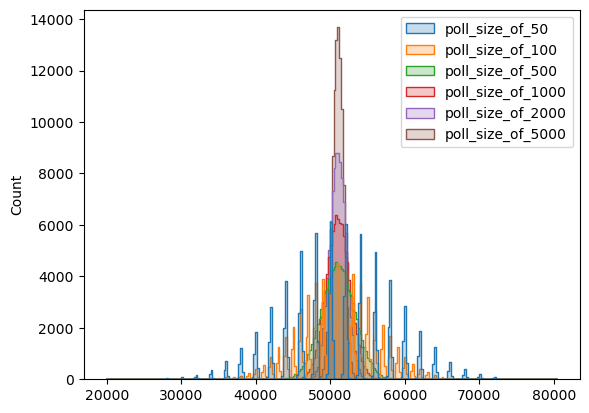

In [52]:
sns.histplot(election_outcomes, binwidth=250, element='step')

Make a plot of standard deviation of outcomes (y-axis) vs. poll sample size (x-axis).

sd  sample_size
poll_size_of_50    7077.253081           50
poll_size_of_100   4997.644691          100
poll_size_of_500   2244.258856          500
poll_size_of_1000  1588.170982         1000
poll_size_of_2000  1129.921183         2000
poll_size_of_5000   723.675043         5000

<AxesSubplot:xlabel='sample_size', ylabel='sd'>

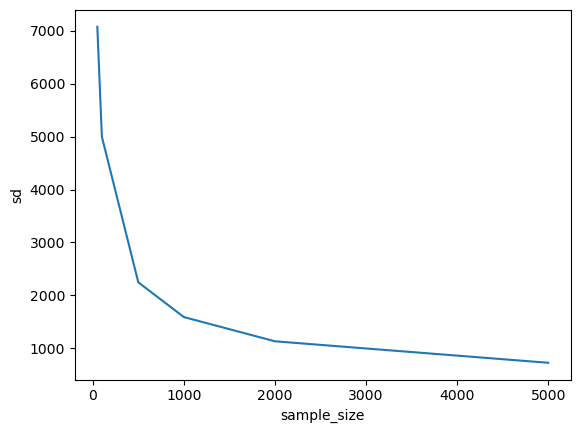

In [53]:
# make df of sd and n
election_outcomes_sd_n = pd.DataFrame(election_outcomes.agg(np.std))
election_outcomes_sd_n['sample_size'] = sample_sizes
election_outcomes_sd_n = election_outcomes_sd_n.rename(columns={0:'sd'})
display(election_outcomes_sd_n)
# plot
sns.lineplot(data=election_outcomes_sd_n, x='sample_size', y='sd')

Based on this plot, why do you think almost all polls sample around 2000 people?

Most people probably sample around 2000 people because you get diminishing returns as you sample more people. Sampling more people beyond 2000 doesn't decrease the standard deviation in proportion to the sample size that much

---

### Re-Write the Multi-Poll Code 

The code for combining three polls using a weighted average works, but it is awkward. Changing it to handle a different number of polls would involve lots of copying and pasting and mistake-prone editing.

Make the code "Pythonic" so that all you have to do is provide a list (or tuple) of poll results and another for poll weights, and your code will do the rest. 

Your code can be just code in a code cell. But if you're feeling spicy, you could make it a function!

In [55]:
# first, without a function
# reset the seed
rng = reset_rng()
# set the constants
poll_ests = [0.53, 0.51, 0.515]
poll_weights = [2, 4, 3]
sum_of_w = np.sum(poll_weights)   
samp_sz = 2000                    # poll sample size 
n_sims = 20000                    # number of simulations to run
# conduct the polls, accounting for their variance
poll_results = {}
poll_probs = {}
for i in range(len(poll_ests)):
    poll_results[i] = rng.binomial(samp_sz, poll_ests[i], n_sims)
    poll_probs[i] = poll_results[i]/samp_sz
# simulate the elections for each poll
elec_results_per_poll = {}
n_voters = 100000
for i in range(len(poll_ests)):
    elec_results_per_poll[i] = rng.binomial(n_voters, poll_probs[i], n_sims)
# weight the election results per poll
weighted_elec_results_per_poll = {}
for i in range(len(poll_ests)):
    weighted_elec_results_per_poll[i] = elec_results_per_poll[i]*poll_weights[i]
weighted_elec_results_per_poll = pd.DataFrame(weighted_elec_results_per_poll)
elec_results = weighted_elec_results_per_poll.sum(axis=1)/sum_of_w # sum the rows and divide by weight
elec_results

0        52007.333333
1        52980.222222
2        51483.000000
3        51200.555556
4        51290.333333
             ...     
19995    52034.111111
19996    52491.111111
19997    51883.333333
19998    52402.333333
19999    51065.888889
Length: 20000, dtype: float64

In [56]:
# now with a function
# every argument has a default
# went ahead and enabled customizable samp_sz
def multi_poll_sim(poll_ests = [0.53, 0.51, 0.515], poll_weights = [2, 4, 3], samp_sz = [2000, 2000, 2000], n_sims = 20000, n_voters = 100000):
    # set the constants
    sum_of_w = np.sum(poll_weights)   
    # conduct the polls, accounting for their variance
    poll_results = {}
    poll_probs = {}
    for i in range(len(poll_ests)):
        poll_results[i] = rng.binomial(samp_sz[i], poll_ests[i], n_sims)
        poll_probs[i] = poll_results[i]/samp_sz[i]
    # simulate the elections for each poll
    elec_results_per_poll = {}
    for i in range(len(poll_ests)):
        elec_results_per_poll[i] = rng.binomial(n_voters, poll_probs[i], n_sims)
    # weight the election results per poll
        weighted_elec_results_per_poll = {}
    for i in range(len(poll_ests)):
        weighted_elec_results_per_poll[i] = elec_results_per_poll[i]*poll_weights[i]
    weighted_elec_results_per_poll = pd.DataFrame(weighted_elec_results_per_poll)
    elec_results = weighted_elec_results_per_poll.sum(axis=1)/sum_of_w # sum the rows and divide by weight
    
    return elec_results

In [57]:
# testing my function
rng = reset_rng()
elec_results = multi_poll_sim()
elec_results

0        52007.333333
1        52980.222222
2        51483.000000
3        51200.555556
4        51290.333333
             ...     
19995    52034.111111
19996    52491.111111
19997    51883.333333
19998    52402.333333
19999    51065.888889
Length: 20000, dtype: float64

In [58]:
# testing my function
rng = reset_rng()
elec_results = multi_poll_sim(poll_weights=[1000, 2000, 3000], samp_sz = [1000, 2000, 3000])
elec_results

0        52013.666667
1        51100.833333
2        52545.833333
3        52654.333333
4        51409.500000
             ...     
19995    52146.833333
19996    51782.500000
19997    51108.500000
19998    50822.000000
19999    51566.000000
Length: 20000, dtype: float64

---

### Weight polls by sample size

Use your new code to compute predicted election outcomes based on 5 polls weighted by the sample sizes of the polls (or their square root, if you prefer – wink wink, nudge nudge). The polls are as follows:

`poll_ests = [.51, .55, .53, .49, 0.50]`

`poll_samp_szs = [2000, 1000, 1500, 1200, 1142]`

In [59]:
rng = reset_rng() # rset the seed
new_poll_ests = [.51, .55, .53, .49, .5]
new_samp_szs = [2000, 1000, 1500, 1200, 1142]
new_weights = np.sqrt(new_samp_szs)
elec_results = multi_poll_sim(poll_ests=new_poll_ests, poll_weights=new_weights, samp_sz=new_samp_szs)
elec_results

0        51822.789250
1        52087.959331
2        51534.541859
3        52107.966563
4        51679.670774
             ...     
19995    51905.732536
19996    51562.650199
19997    50834.648022
19998    51383.395449
19999    50873.512505
Length: 20000, dtype: float64

Make a plot of the distribution of simulated outcomes, with the area representing the underdog winning highlighted.

In [60]:
# create a new column for elec resutls to map onto hue
wins = []
for i in range(len(elec_results)):
    if elec_results[i] >= 50000:
        wins.append("Favorite")
    else:
        wins.append("Underdog")
elec_results = pd.DataFrame(elec_results)
elec_results['wins'] = wins
elec_results = elec_results.rename(columns={0:'votes_for_favorite'})
elec_results

votes_for_favorite      wins
0            51822.789250  Favorite
1            52087.959331  Favorite
2            51534.541859  Favorite
3            52107.966563  Favorite
4            51679.670774  Favorite
...                   ...       ...
19995        51905.732536  Favorite
19996        51562.650199  Favorite
19997        50834.648022  Favorite
19998        51383.395449  Favorite
19999        50873.512505  Favorite

[20000 rows x 2 columns]

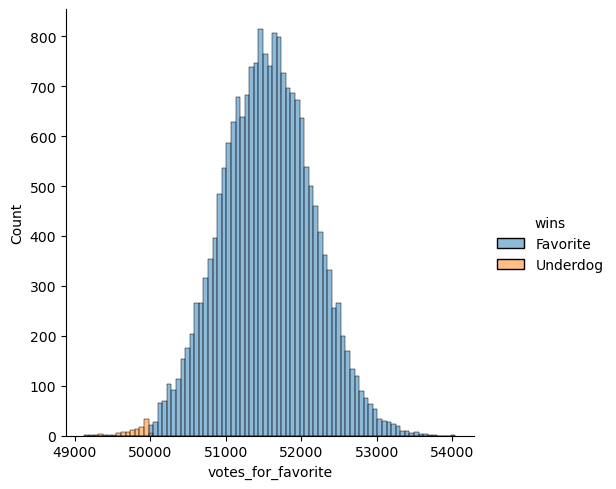

In [61]:
sns.displot(elec_results, x='votes_for_favorite', hue='wins')

---

Bonus (totally optional): 
Write your own function, `my_binom()` that does the same thing as `rng.binomial()`. The function should use `rng.random()` internally. To the user, it should behave just like `rng.binomial()`!

---